In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import time
import random as rd
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('law.csv')
df.drop(df.columns.values[0], inplace=True, axis=1)
df.head()

,observation,LSAT,GPA
0,1,576,3.39
1,2,635,3.30
2,3,558,2.81
3,4,578,3.03
4,5,666,3.44


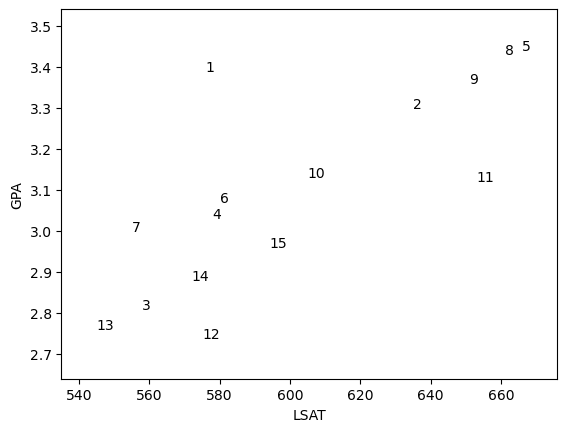

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(df['LSAT'].min()-10, df['LSAT'].max()+10)
ax.set_ylim(df['GPA'].min()-.1, df['GPA'].max()+.1)
ax.set_xlabel('LSAT')
ax.set_ylabel('GPA')
for i in range(len(df)):
    ax.annotate(df['observation'][i], (df['LSAT'][i], df['GPA'][i]))


In [16]:
# Compute the original statistics
start = time.time()
boot_tr = []
def recursive(array):
    if len(array) == 16:
        return
    if set(array) in boot_tr:
        return   
    if len(array) > 1:         
        boot_tr.append(set(array))
    for i in range(15):
        p = list(array)
        p.append(i)
        recursive(p)
recursive([])  
print(len(boot_tr))
boot_samples = [] 
for i in range(len(boot_tr)):
    if len(list(boot_tr[i])) > 1:
        boot_samples.append(list(boot_tr[i]))
print(f"Time to compute all combinations: {time.time() - start:.4f} seconds")

boot_stats = []
for i in range(len(boot_samples)):
    bootstrap_sample = df.loc[boot_samples[i], ["LSAT", "GPA"]]
    boot_stats.append(pearsonr(bootstrap_sample["LSAT"], bootstrap_sample["GPA"])[0])
    
# Compute the bootstrap statistics
boot_mean = np.mean(boot_stats)
boot_std = np.std(boot_stats)
boot_bias = boot_mean - pearsonr(df["LSAT"], df["GPA"])[0]
boot_ci = np.percentile(boot_stats, [2.5, 97.5])

# Print the bootstrap statistics
print("Bootstrap Statistics:")
print(f"    original   bias    std. error")
print(f"t1* {pearsonr(df['LSAT'], df['GPA'])[0]:.6f} {boot_bias:.6f}  {boot_std:.6f}")
print(f"CI  {boot_ci[0]:.6f}  {boot_ci[1]:.6f}")

32766
Time to compute all combinations: 79.6599 seconds
Bootstrap Statistics:
    original   bias    std. error
t1* 0.776374 -0.010570  0.177486
CI  0.353952  0.987496


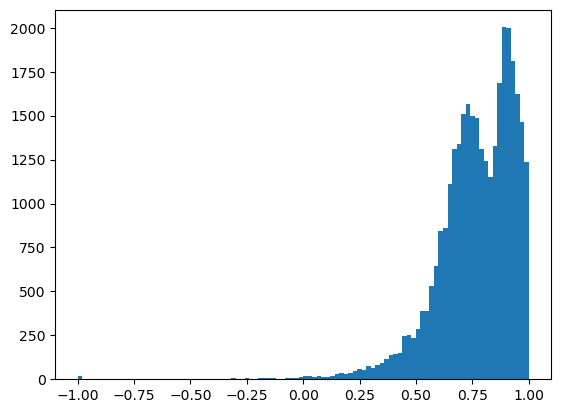

In [17]:
plt.hist(boot_stats, bins=100)
plt.show()

## exo2

In [18]:
start = time.time()
k = 15
matrix = np.zeros((2**k, k))
matrix[0, :] = np.array([0 for i in range(k)])
for i in range(1, 2**k):
    matrix[i, :] = matrix[i-1, :]
    for j in range(k):
        if matrix[i, j] == 0:
            matrix[i, j] = 1
            break
        else:
            matrix[i, j] = 0
            
print(f"Time to compute all combinations: {time.time() - start:.4f} seconds")
# matrix

Time to compute all combinations: 0.0452 seconds


In [19]:
# Perform the complete enumeration bootstrap with gray code
boot_tr = [np.array([i for i in range(k) if matrix[j, i] == 1]) for j in range(2**k)]
boot_samples = []
for i in range(len(boot_tr)):
    if len(boot_tr[i]) > 1:
        boot_samples.append(list(boot_tr[i]))

boot_stats = []     
for i in range(len(boot_samples)):
    bootstrap_sample = df.loc[boot_samples[i], ["LSAT", "GPA"]]
    boot_stats.append(pearsonr(bootstrap_sample["LSAT"], bootstrap_sample["GPA"])[0])
    
# Compute the bootstrap statistics
boot_mean = np.mean(boot_stats)
boot_std = np.std(boot_stats)
boot_bias = boot_mean - pearsonr(df["LSAT"], df["GPA"])[0]
boot_ci = np.percentile(boot_stats, [2.5, 97.5])

# Print the bootstrap statistics
print("Bootstrap Statistics:")
print(f"    original   bias    std. error")
print(f"t1* {pearsonr(df['LSAT'], df['GPA'])[0]:.6f} {boot_bias:.6f}  {boot_std:.6f}")
print(f"CI  {boot_ci[0]:.6f}  {boot_ci[1]:.6f}")

Bootstrap Statistics:
    original   bias    std. error
t1* 0.776374 -0.010570  0.177483
CI  0.353955  0.987496


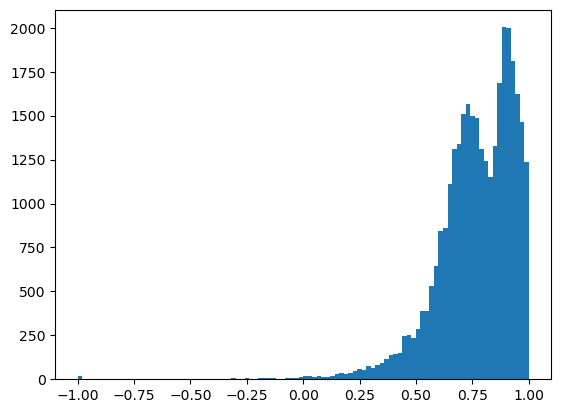

In [20]:
plt.hist(boot_stats, bins=100)
plt.show()

## Exo4

In [21]:
def corr_boot(x, index):
    return pearsonr(x.loc[index, "LSAT"], x.loc[index, "GPA"])[0]

# perform Monte Carlo bootstrap with B = 40000 samples
np.random.seed(654)
rd.seed(654)
bootstrap_stats = np.zeros((40000))
for i in range(40000):
    size = rd.randint(2, 15)
    bootstrap_stats[i] = corr_boot(df, np.random.choice(df.index, size=size, replace=False))
    
# Compute the bootstrap statistics
boot_mean = np.mean(bootstrap_stats)
boot_std = np.std(bootstrap_stats)
boot_bias = boot_mean - pearsonr(df["LSAT"], df["GPA"])[0]
boot_ci = np.percentile(bootstrap_stats, [2.5, 97.5])

# Print the bootstrap statistics
print("Bootstrap Statistics:")
print(f"    original   bias    std. error")
print(f"t1* {pearsonr(df['LSAT'], df['GPA'])[0]:.6f} {boot_bias:.6f}  {boot_std:.6f}")
print(f"CI  {boot_ci[0]:.6f}  {boot_ci[1]:.6f}")

Bootstrap Statistics:
    original   bias    std. error
t1* 0.776374 -0.020735  0.274420
CI  0.099797  1.000000


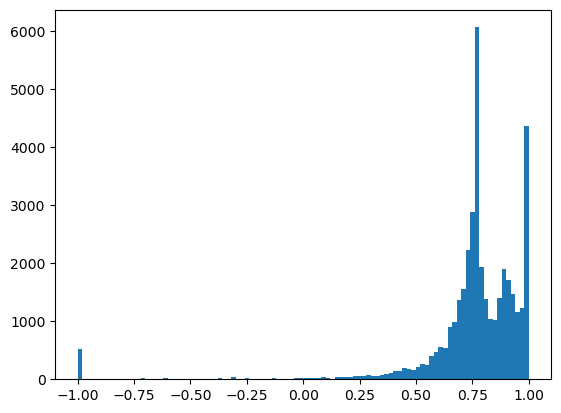

In [22]:
plt.hist(bootstrap_stats, bins=100)
plt.show()